In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv("diabetes.csv")

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Outcome',axis = 1))

StandardScaler()

In [5]:
X = df.drop(columns = 'Outcome',axis = 1)
y = df['Outcome']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [9]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [37]:
knn = KNeighborsClassifier(n_neighbors= 1)

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(p=1)

In [17]:
y_pred = knn.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test,y_pred)

In [23]:
print(accuracy)

0.6688311688311688


In [21]:
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
print(confusion_matrix(y_test,y_pred))

[[71 28]
 [23 32]]


In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74        99
           1       0.53      0.58      0.56        55

    accuracy                           0.67       154
   macro avg       0.64      0.65      0.65       154
weighted avg       0.68      0.67      0.67       154



In [25]:
## USING ELBOW METHOD TO PICK A GOOD k value
error_rate = []


for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [29]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'Error Rate')

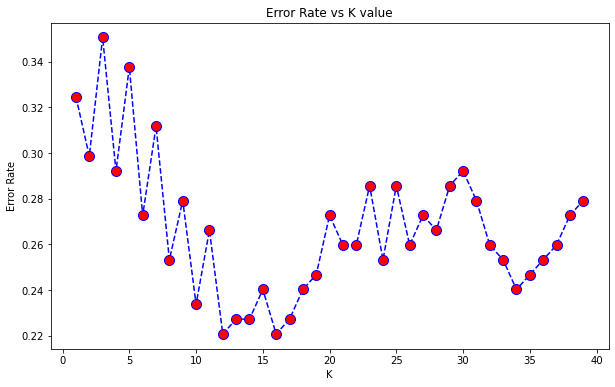

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red',markersize = 10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [32]:
# K = 1

knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K = 1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K = 1


[[70 29]
 [21 34]]


              precision    recall  f1-score   support

           0       0.77      0.71      0.74        99
           1       0.54      0.62      0.58        55

    accuracy                           0.68       154
   macro avg       0.65      0.66      0.66       154
weighted avg       0.69      0.68      0.68       154



In [34]:
knn = KNeighborsClassifier(n_neighbors = 23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K = 23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K = 23


[[82 17]
 [27 28]]


              precision    recall  f1-score   support

           0       0.75      0.83      0.79        99
           1       0.62      0.51      0.56        55

    accuracy                           0.71       154
   macro avg       0.69      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154

